In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
spark_iris=pd.read_csv("Iris.csv")

In [18]:
spark_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
spark_iris["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

we have four features with species name and Id

so we have two implement clustering algorithm and predict number of cluster

Now we r going to drop id column and making species as our label

In [23]:
spark_iris.drop("Id",axis=1,inplace=True)

In [24]:
label=spark_iris["Species"]

In [25]:
spark_iris.drop("Species",axis=1,inplace=True)

# Principal Component Analysis 

PCA is used to reduce the dimension of data(from 4d to 2d)so we can visulize it easliy

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
spark_iris_pca = pca.fit_transform(spark_iris)

Lets plot the curve

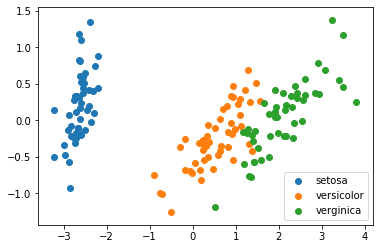

In [39]:
plt.scatter(spark_iris_pca[0:50,0],spark_iris_pca[0:50,1],label="setosa")
plt.scatter(spark_iris_pca[50:100,0],spark_iris_pca[50:100,1],label="versicolor")
plt.scatter(spark_iris_pca[100:150,0],spark_iris_pca[100:150,1],label="verginica")
plt.legend()
plt.show()

Now lets do unsupervised techniques to predict Number of clusters and build a final visulisation and match that with above

# KMeans Clustering

So to find number of k clusters we will use elbow method 

In [46]:
from sklearn.cluster import KMeans
m=[]
p=[]
for k in range(1,10):
    km=KMeans(n_clusters=k, random_state=42).fit(spark_iris_pca)
    m.append(km.inertia_)
    p.append(km)

In [47]:
m

[665.5955666521968,
 137.15100934920733,
 63.87383806036226,
 42.324698099439686,
 33.539408107901295,
 26.062824235909112,
 21.991283374105127,
 18.154862467849213,
 15.737984019089952]

ELBOW METHOD

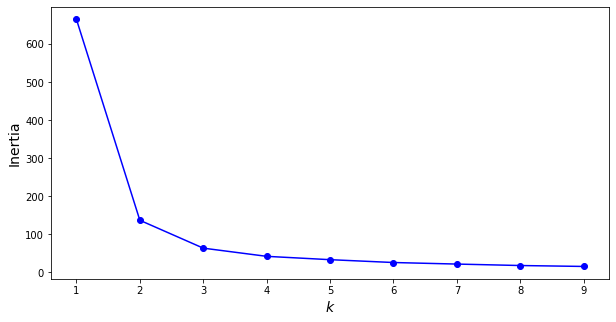

In [48]:
plt.figure(figsize=(10,5))
plt.plot(range(1, 10),m, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

Clearly we see k=3 as the best value for number of clusters

Silhouette score

In [54]:
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(spark_iris_pca)

In [55]:
t=kmeans.labels_

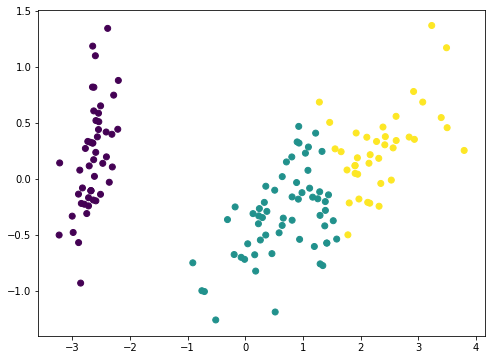

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(spark_iris_pca[:,0], spark_iris_pca[:,1], c=kmeans.labels_.astype(float))
plt.show()

CLEARLY WE SEE THAT ABOVE TWO DIAGRAMS MATCH HENCE THERE NUMBER OF CLUSTER=3 IS CORRECT